# Plotting Data

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.attack import *
from src.create import *
from src.measure import *
import networkx as nx

### Maps Figure

In [3]:
nodefile = "../data/vertex/vertex.csv"
edgefile = "../data/edge/edge.csv"
jsonfile = "../data/geojson/multigraph.geojson"

import pandas as pd
import geopandas
import contextily as cx

df_geo = geopandas.read_file(jsonfile)
df_vertex = pd.read_csv(nodefile)
df_edge = pd.read_csv(edgefile)

filter_list = ['metro']
df_metro = df_geo[df_geo.layer.isin(filter_list)]
filter_list = ['train']
df_train = df_geo[df_geo.layer.isin(filter_list)]
filter_list = ['train', 'metro']
df_train_metro = df_geo[df_geo.layer.isin(filter_list)]

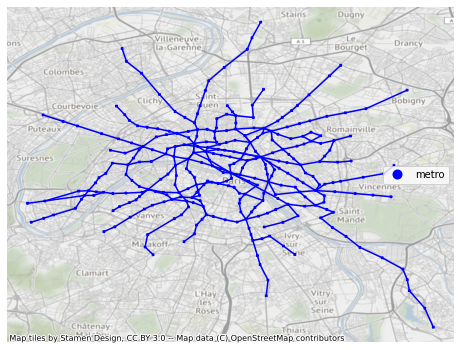

In [25]:
# metro only
ax = df_metro.plot(
                   marker='x',
                    column="layer",
                   legend=True,
                   legend_kwds={'loc': 'right'},
                   cmap="winter",  
                   markersize=5, 
                   figsize=(8, 8))
cx.add_basemap(ax, alpha=0.7, crs=df_metro.crs)

ax.set_axis_off()

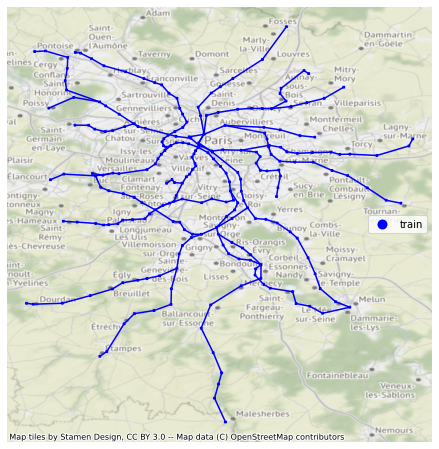

In [24]:
# train only
ax = df_train.plot(
                   marker='x',
                    column="layer",
                   legend=True,
                   legend_kwds={'loc': 'right'},
                   cmap="winter",  
                   markersize=5, 
                   figsize=(8, 8))
cx.add_basemap(ax, alpha=0.7, crs=df_metro.crs)

ax.set_axis_off()

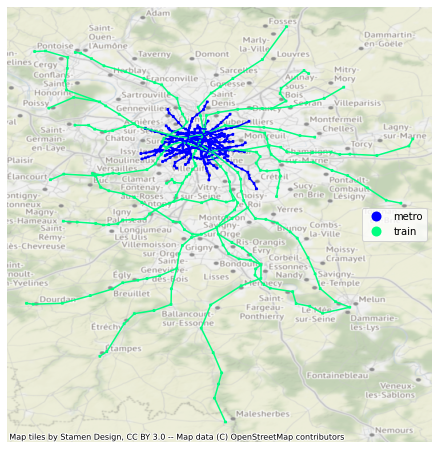

In [19]:
# both train and metro
ax = df_train_metro.plot(
                   marker='x',
                    column="layer",
                   legend=True,
                   legend_kwds={'loc': 'right'},
                   cmap="winter",  
                   markersize=5, 
                   figsize=(8, 8))
cx.add_basemap(ax, alpha=0.6, crs=df_train_metro.crs)

ax.set_axis_off()

### ER Figure

In [10]:
ER500= np.loadtxt('results/sy/er/t20/ERn500k4.csv',delimiter=",")
ER1000= np.loadtxt('results/sy/er/t20/ERn1000k4.csv',delimiter=",")
ER2000= np.loadtxt('results/sy/er/t20/ERn2000k4.csv',delimiter=",")

#ER500= np.loadtxt('results/ER/t20/ERn500k4_20.csv',delimiter=",")
#ER1000= np.loadtxt('results/ER/t20/ERn1000k4_20.csv',delimiter=",")
#ER2000= np.loadtxt('results/ER/t20/ERn2000k4_20.csv',delimiter=",")


results = [ER500, ER1000, ER2000]
k=4
labels= ["ER model, N=500, <k>=4","ER model, N=1000", "ER model, N=2000"]
path="figure/Fig_ER_t20.png"
p_theory=True
residual = False

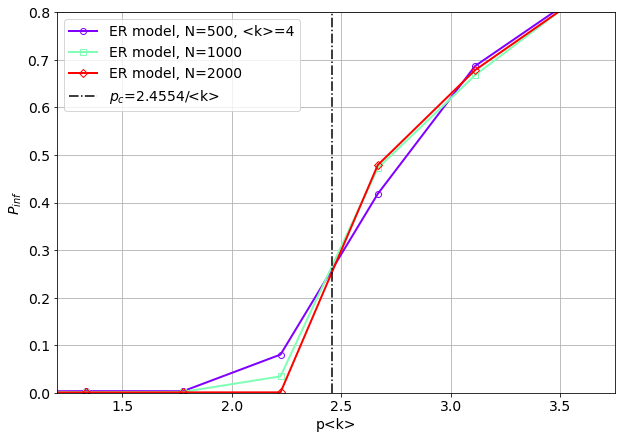

In [11]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 14})
color = iter(plt.cm.rainbow(np.linspace(0.0, 1, len(results))))
marker = ['o', 's', 'D', 'v']

for i, res in enumerate(results):
    pks = res[0] * k
    p_infs = res[1]

    plt.plot(pks, p_infs, c=next(color), linewidth=2, marker = marker[i], mfc = "None", label = labels[i])

if p_theory:
    plt.vlines(2.4554, ymin=0, ymax=1, colors='k', linestyles='dashdot', label='$p_{c}$=2.4554/<k>')

if k > 1:
    plt.xlabel('p<k>')
else:
    plt.xlabel('p')

if residual:
    plt.hlines(results[0][1][0], xmin=0, xmax=1, linestyles='dotted', colors='k')

plt.legend()
plt.ylabel('$P_{inf}$')
plt.xlim(1.2,3.75)
plt.ylim(0, 0.8)
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### SF Figure

In [59]:
SFn1000_28_k4 = np.loadtxt('results/SF/SFn1000_28_k4.csv',delimiter=",")
SFn1000_29_k4 = np.loadtxt('results/SF/SFn1000_29_k4.csv',delimiter=",")
SFn1000_30_k4 = np.loadtxt('results/SF/SFn1000_30_k4.csv',delimiter=",")
ERn1000k4 = np.loadtxt('results/sy/er/t20/ERn1000k4.csv',delimiter=",")

results = [ SFn1000_28_k4, SFn1000_29_k4,SFn1000_30_k4,ERn1000k4]
k = 1
labels= ["SF, lambda=2.8, <k> = 4, n = 1000", "SF, lambda=2.9", "SF, lambda=3.0","ER"]
path = "figure/Fig_SF.png"
p_theory=False
residual = False


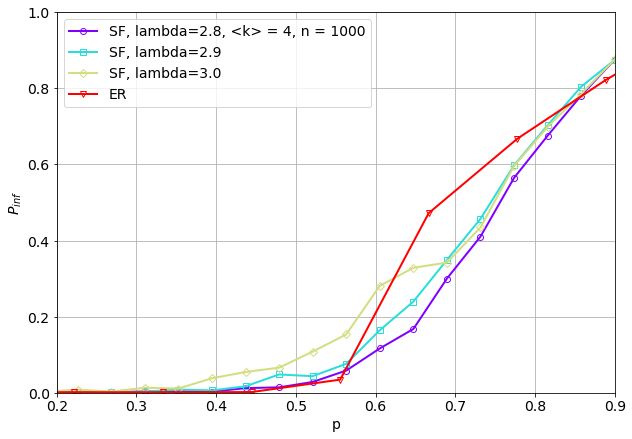

In [61]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 14})
color = iter(plt.cm.rainbow(np.linspace(0.0, 1, len(results))))
marker = ['o', 's', 'D', 'v']

for i, res in enumerate(results):
    pks = res[0] * k
    p_infs = res[1]

    plt.plot(pks, p_infs, c=next(color), linewidth=2, marker = marker[i], mfc = "None", label = labels[i])

if p_theory:
    plt.vlines(2.4554, ymin=0, ymax=1, colors='k', linestyles='dashdot', label='$p_{c}$=2.4554/<k>')
    plt.legend()

if k > 1:
    plt.xlabel('p<k>')
else:
    plt.xlabel('p')

if residual:
    plt.hlines(results[0][1][0], xmin=0, xmax=1, linestyles='dotted', colors='k')
plt.legend()
plt.ylabel('$P_{inf}$')
plt.xlim(0.2,0.9)
plt.ylim(0, 1)
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Paris

In [30]:
Paris_intMetro_cascResult = np.loadtxt('results/PARIS/metroCascade_with_layerInfo.csv',delimiter=",")
Paris_intTrain_cascResult = np.loadtxt('results/PARIS/trainCascade_with_layerInfo.csv',delimiter=",")

In [34]:
# metro <k>:  2.34983498349835
# train <k>:  2.024896265560166
# intd metro train <k>:  2.4411764705882355

G_metro_avgk = 1
G_train_avgk = 1
G_intd_m_tr_avgk = 1

# G_metro_avgk = 2.34983498349835
# G_train_avgk = 2.024896265560166
# G_intd_m_tr_avgk = 2.4411764705882355

metro_data = np.loadtxt('results/PARIS/single_metro_t50.csv',delimiter=",")
train_data = np.loadtxt('results/PARIS/single_train_t50.csv',delimiter=",")

# Single Metro, Train Data rescaling
metro_data_scale = metro_data[0]*G_metro_avgk
train_data_scale = train_data[0]*G_train_avgk

# Interdependent Metro Cascade Data rescaling
intd_m_tr_data_scale = Paris_intMetro_cascResult[0]*G_intd_m_tr_avgk
intd_m_tr_metro_data_scale = Paris_intMetro_cascResult[0]*G_metro_avgk
intd_m_tr_train_data_scale = Paris_intMetro_cascResult[0]*G_train_avgk

# Interdependent Train Cascade Data rescaling
intd_tr_m_data_scale = Paris_intTrain_cascResult[0]*G_intd_m_tr_avgk
intd_tr_m_train_data_scale = Paris_intTrain_cascResult[0]*G_train_avgk
intd_tr_m_metro_data_scale = Paris_intTrain_cascResult[0]*G_metro_avgk



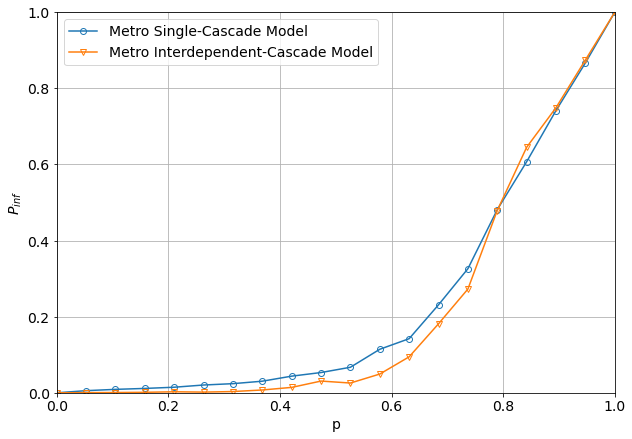

In [62]:
plt.figure(figsize=(10,7))
plt.plot(metro_data_scale, metro_data[1], 
        label="Metro Single-Cascade Model", marker='o', mfc = "None")
plt.plot(intd_m_tr_metro_data_scale, Paris_intMetro_cascResult[2], 
        label = "Metro Interdependent-Cascade Model", marker='v', mfc = "None")

plt.ylabel('$P_{inf}$')
plt.xlabel('p')
plt.legend(loc="upper left")
plt.ylabel('$P_{inf}$')
plt.ylim(0, 1)
plt.xlim(0,1)
path = "figure/Fig_Real1.png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [ ]:
# plt.figure(figsize=(10,7))
# plt.plot(train_data_scale, train_data[1], 
#         label="Train Single-Cascade Model", marker='s', mfc = "None")
# plt.plot(intd_tr_m_train_data_scale, Paris_intTrain_cascResult[2], 
#         label = "Train Interdependent-Cascade Model", marker='*', mfc = "None")
# plt.legend()

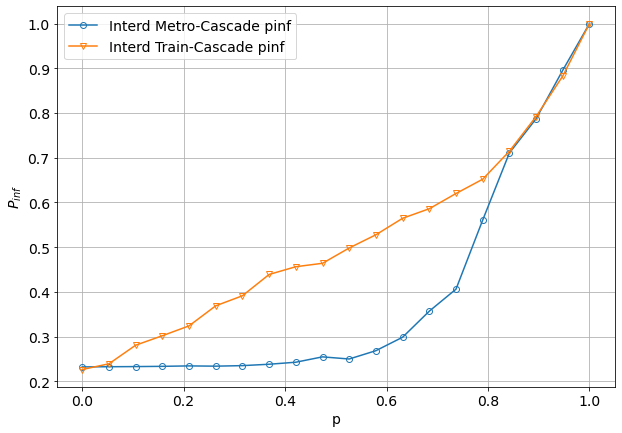

In [44]:
plt.figure(figsize=(10,7))
plt.plot(Paris_intMetro_cascResult[0], Paris_intMetro_cascResult[1], 
        label="Interd Metro-Cascade pinf", marker='o', mfc = "None")
plt.plot(Paris_intTrain_cascResult[0], Paris_intTrain_cascResult[1], 
        label = "Interd Train-Cascade pinf", marker='v', mfc = "None")

plt.ylabel('$P_{inf}$')
plt.xlabel('p')
plt.legend(loc="upper left")
plt.ylabel('$P_{inf}$')
path = "figure/Fig_Real2.png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [ ]:
# print("Paris Metro-Train Network... Cascade Failure applied to Metro Network")
# plt.plot(Paris_intMetro_cascResult[0],Paris_intMetro_cascResult[1], label = "Interd pinf")
# plt.plot(Paris_intMetro_cascResult[0],Paris_intMetro_cascResult[2], label = "Metro pinf")
# plt.plot(Paris_intMetro_cascResult[0],Paris_intMetro_cascResult[3], label = "Train pinf")
# plt.legend()

In [ ]:
# print("Paris Metro-Train Network... Cascade Failure applied to Train Network")
# plt.plot(Paris_intTrain_cascResult[0],Paris_intTrain_cascResult[1], label = "Interd pinf")
# plt.plot(Paris_intTrain_cascResult[0],Paris_intTrain_cascResult[2], label = "Train pinf")
# plt.plot(Paris_intTrain_cascResult[0],Paris_intTrain_cascResult[3], label = "Metro pinf")
# plt.legend()